In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("D:/Python/cv2/CM.png")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 150]) #파란색 계열의 범위 설정
upper_blue = np.array([130, 255, 255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)
contours, hierachy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#contour를 감싸는 사각형들의 x, y, w, h를 'rects'에 저장
rects = [cv2.boundingRect(contour) for contour in contours]

rects_selected = []
for rect in rects:
    if rect[0] > 1200 and 100 < rect[1] < 200:
        rects_selected.append(rect)
rects_selected.sort(key=lambda x:x[0])

for i, rect in enumerate(rects_selected):
    cv2.rectangle(img, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (0, 0, 255), 2)
    cv2.putText(img, str(i+1), (rect[0]-5, rect[1]-5), fontFace=0, fontScale=0.6, color=(0, 0, 255), thickness=2)
    cv2.circle(img, (rect[0]+1, rect[1]-12), 12, (0, 0, 255), 2)

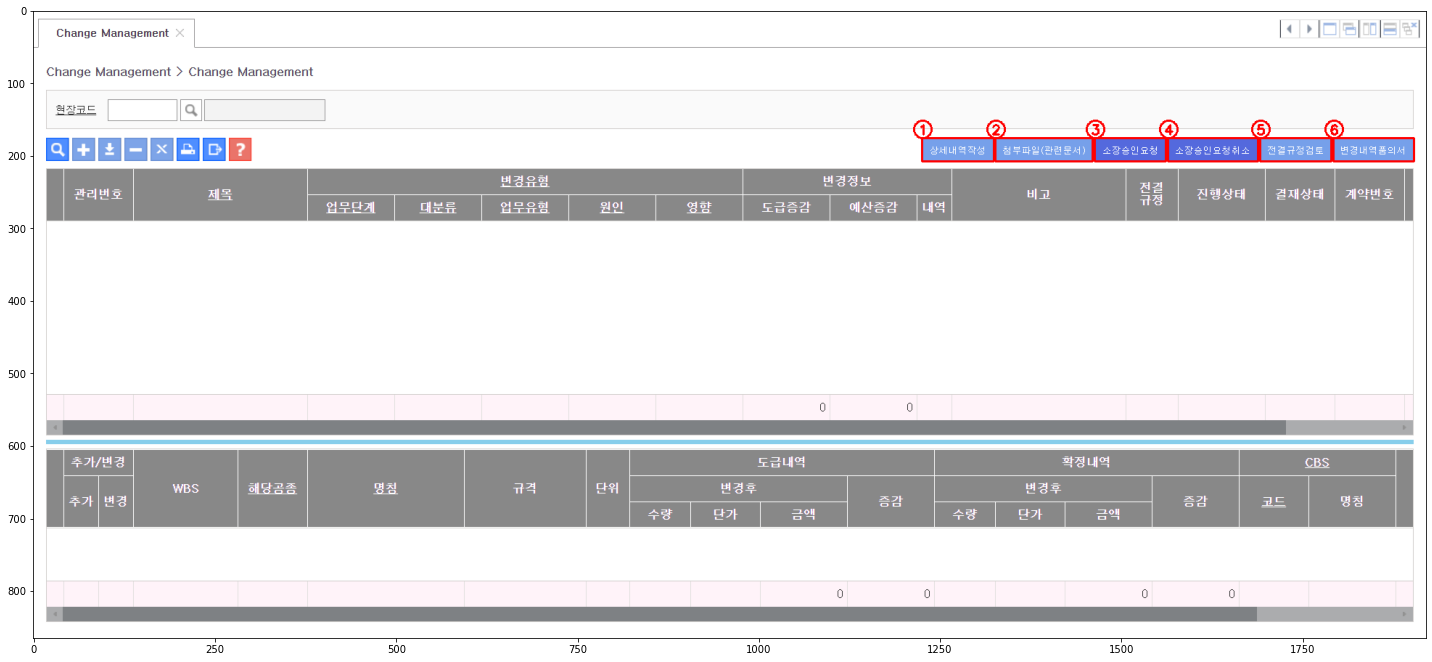

In [3]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))